In [ ]:
!pip install datasets pandas

In [11]:
import pandas as pd
from datasets import load_dataset
import warnings

# Hugging Face uyarılarını (HF_TOKEN gibi) geçici olarak yok say
warnings.filterwarnings("ignore")

# 1. VERİ SETİNİ YÜKLEME
REPO_ID = "ganchengguang/resume-5label-classification"

print(f"1. Veri seti ({REPO_ID}) yükleniyor...")
try:
    # 'train' splitini yükle
    dataset = load_dataset(REPO_ID, split="train")
    df = dataset.to_pandas()
    print("Yükleme başarılı. Başlangıçta 40001 satır ve tek 'text' sütunu mevcut.")
except Exception as e:
    print(f"Hata oluştu, Repo ID'yi tekrar kontrol edin: {e}")
    exit()

1. Veri seti (ganchengguang/resume-5label-classification) yükleniyor...


Repo card metadata block was not found. Setting CardData to empty.


Yükleme başarılı. Başlangıçta 40001 satır ve tek 'text' sütunu mevcut.


In [12]:
# 2. VERİ AYIRMA (LABEL ve METİN AYRIŞTIRMA)
print("\n2. Veri ayırma ve temizleme işlemi başlatılıyor...")

# İlk tab (\t) karakterine göre ayırarak Ana Etiketi alıyoruz.
df[['main_label', 'remaining_text']] = df['text'].str.split('\t', n=1, expand=True)

# Kalan metni tekrar ayırarak Sub_Label ve Asıl Metni alıyoruz.
df[['sub_label', 'clean_text']] = df['remaining_text'].str.split('\t', n=1, expand=True)

# 3. GEREKSİZ SÜTUNLARI ÇIKARMA
df = df.drop(columns=['text', 'remaining_text'])


2. Veri ayırma ve temizleme işlemi başlatılıyor...


In [13]:
# 4. SONUÇLARI KONTROL ETME
print("\n3. Veri ayırma ve temizleme işlemi tamamlandı.")
print("-" * 50)
print("Yeni Veri Yapısı (İlk 5 Satır):")
print(df[['main_label', 'sub_label', 'clean_text']].head())
print("-" * 50)

print("\n4. Ana Etiket Dağılımı (Sınıflandırma Hedefiniz):")
print(df['main_label'].value_counts())
print("-" * 50)


3. Veri ayırma ve temizleme işlemi tamamlandı.
--------------------------------------------------
Yeni Veri Yapısı (İlk 5 Satır):
  main_label   sub_label                                         clean_text
0       meta      others                                 Jitesh Vishwakarma
1       meta      others             E-mail-Id: - jvishwakarma123@gmail.com
2       meta      others                       Contact Number: - 9960902548
3     header  experience                              PROFESSIONAL SUMMARY:
4    content  experience  · 4 years of technical experience in implement...
--------------------------------------------------

4. Ana Etiket Dağılımı (Sınıflandırma Hedefiniz):
main_label
content    27341
meta        7311
header      5349
Name: count, dtype: int64
--------------------------------------------------


In [14]:
# df değişkeni önceki kodda tanımlandı
print("Yeni Veri Yapısı (İlk 60 Satır):")
print(df[['main_label', 'sub_label', 'clean_text']].head(60))

print("\nAlt Etiket (sub_label) Dağılımı:")
# İlk 60 satırda görünen alt etiket sayıları
print(df['sub_label'].head(60).value_counts())

Yeni Veri Yapısı (İlk 60 Satır):
   main_label   sub_label                                         clean_text
0        meta      others                                 Jitesh Vishwakarma
1        meta      others             E-mail-Id: - jvishwakarma123@gmail.com
2        meta      others                       Contact Number: - 9960902548
3      header  experience                              PROFESSIONAL SUMMARY:
4     content  experience  · 4 years of technical experience in implement...
5     content  experience  · Having Domain Experience in PAYMENT, AUTOMOB...
6     content  experience  · Experienced in developing Web based applicat...
7     content  experience  · Experience in designing, developing and depl...
8     content  experience                 · Exposure to AGILE methodologies.
9     content  experience  · Hands on exposure to multiple Application Se...
10    content  experience  · Expertise in back-end procedure development,...
11     header   knowledge                  

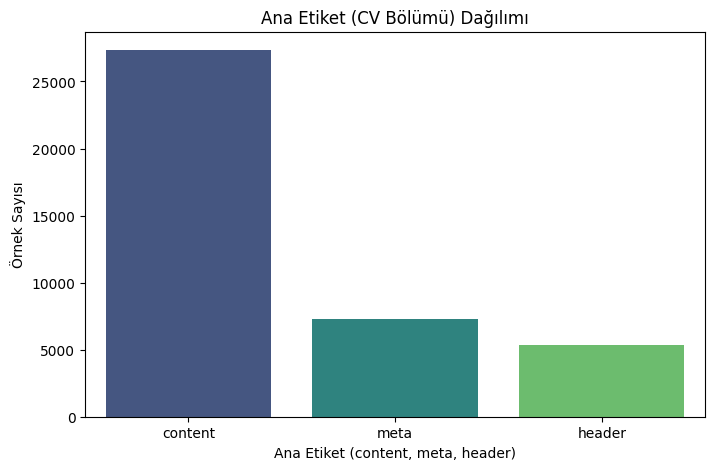

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='main_label', data=df, order=df['main_label'].value_counts().index, palette='viridis')
plt.title('Ana Etiket (CV Bölümü) Dağılımı')
plt.xlabel('Ana Etiket (content, meta, header)')
plt.ylabel('Örnek Sayısı')
plt.show()

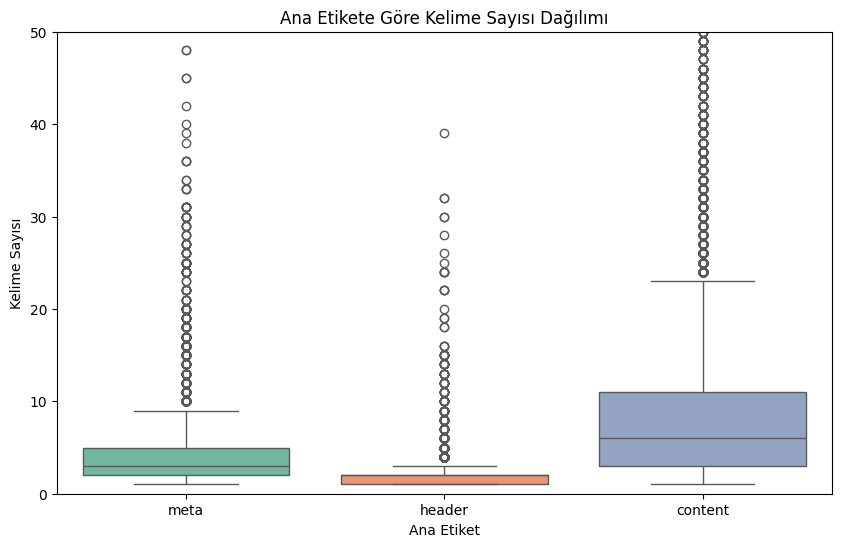

In [16]:
# Yeni bir sütun oluştur: Her satırdaki kelime sayısı
df['word_count'] = df['clean_text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
# Box plot ile her etiket grubunun kelime sayısını karşılaştıralım
sns.boxplot(x='main_label', y='word_count', data=df, palette='Set2')
plt.title('Ana Etikete Göre Kelime Sayısı Dağılımı')
plt.xlabel('Ana Etiket')
plt.ylabel('Kelime Sayısı')
plt.ylim(0, 50)
plt.show()

In [ ]:
# DOSYAYI SADECE DOSYA ADI İLE KAYDET
# Bu dosya, Colab'ın sol menüsündeki "Dosyalar" sekmesinde görünecektir.
df[['clean_text', 'main_label', 'sub_label']].to_csv(
    'clean_cv_data.csv',
    index=False
)
print("Temizlenmiş veri, Colab'ın geçici ortamına kaydedildi (clean_cv_data.csv).")